## Dataset preprocessing

In [12]:
import pandas as pd

# Load datas
data_path = "data/mushroom_cleaned.csv"
mushrooms_df = pd.read_csv(data_path)

# Preview the first lines
print("First rows :\n")
mushrooms_df.head(3)

First rows :



,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [13]:
# Check data types
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [14]:
# Check data statistics
mushrooms_df.describe().iloc[1:] # Without the count line

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [15]:
# Check missing values in the dataframe
mushrooms_df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [16]:
# Show the correlation between columns of our dataframe
mushrooms_df_corr = mushrooms_df.corr()['class'][:-1] # -1 to remove the last row which is class
mushrooms_df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Let’s analyze outliers. We will calculate the z-scores for each column in the DataFrame and provide descriptive statistics of these z-scores.

In [17]:
from scipy import stats

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(mushrooms_df), columns=mushrooms_df.columns)

# Generate descriptive statistics for the z-scores
z_scores.describe().round(3) # Rounded value for visibility

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.576,-1.852,-0.961,-2.290,-1.165,-1.344,-2.581,-3.026,-1.104
25%,-0.773,-0.926,-0.961,-0.728,-0.750,-0.806,-0.741,-0.208,-1.104
50%,-0.117,0.463,-0.512,0.210,-0.255,-0.164,0.792,-0.029,0.906
75%,0.594,0.926,0.834,0.834,0.454,0.603,0.792,-0.029,0.906
max,3.678,0.926,1.731,1.147,4.726,3.220,1.098,2.788,0.906


We can now remove the highlighted outliers 

In [18]:
import numpy as np

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Count the number of rows before cleaning outliers
old_rows_count = mushrooms_df.shape[0]

# Drop the identified rows containing outliers
mushrooms_df = mushrooms_df.drop(outliers.index)

# Calculate and show how many rows were removed
new_rows_count = mushrooms_df.shape[0]
removed = old_rows_count - new_rows_count

print("New dataframe has {} rows.\n{} rows were removed.".format(new_rows_count, removed))

New dataframe has 50397 rows.
3638 rows were removed.


Let's plot the distributions of all columns with a hue class with *Seaborn*


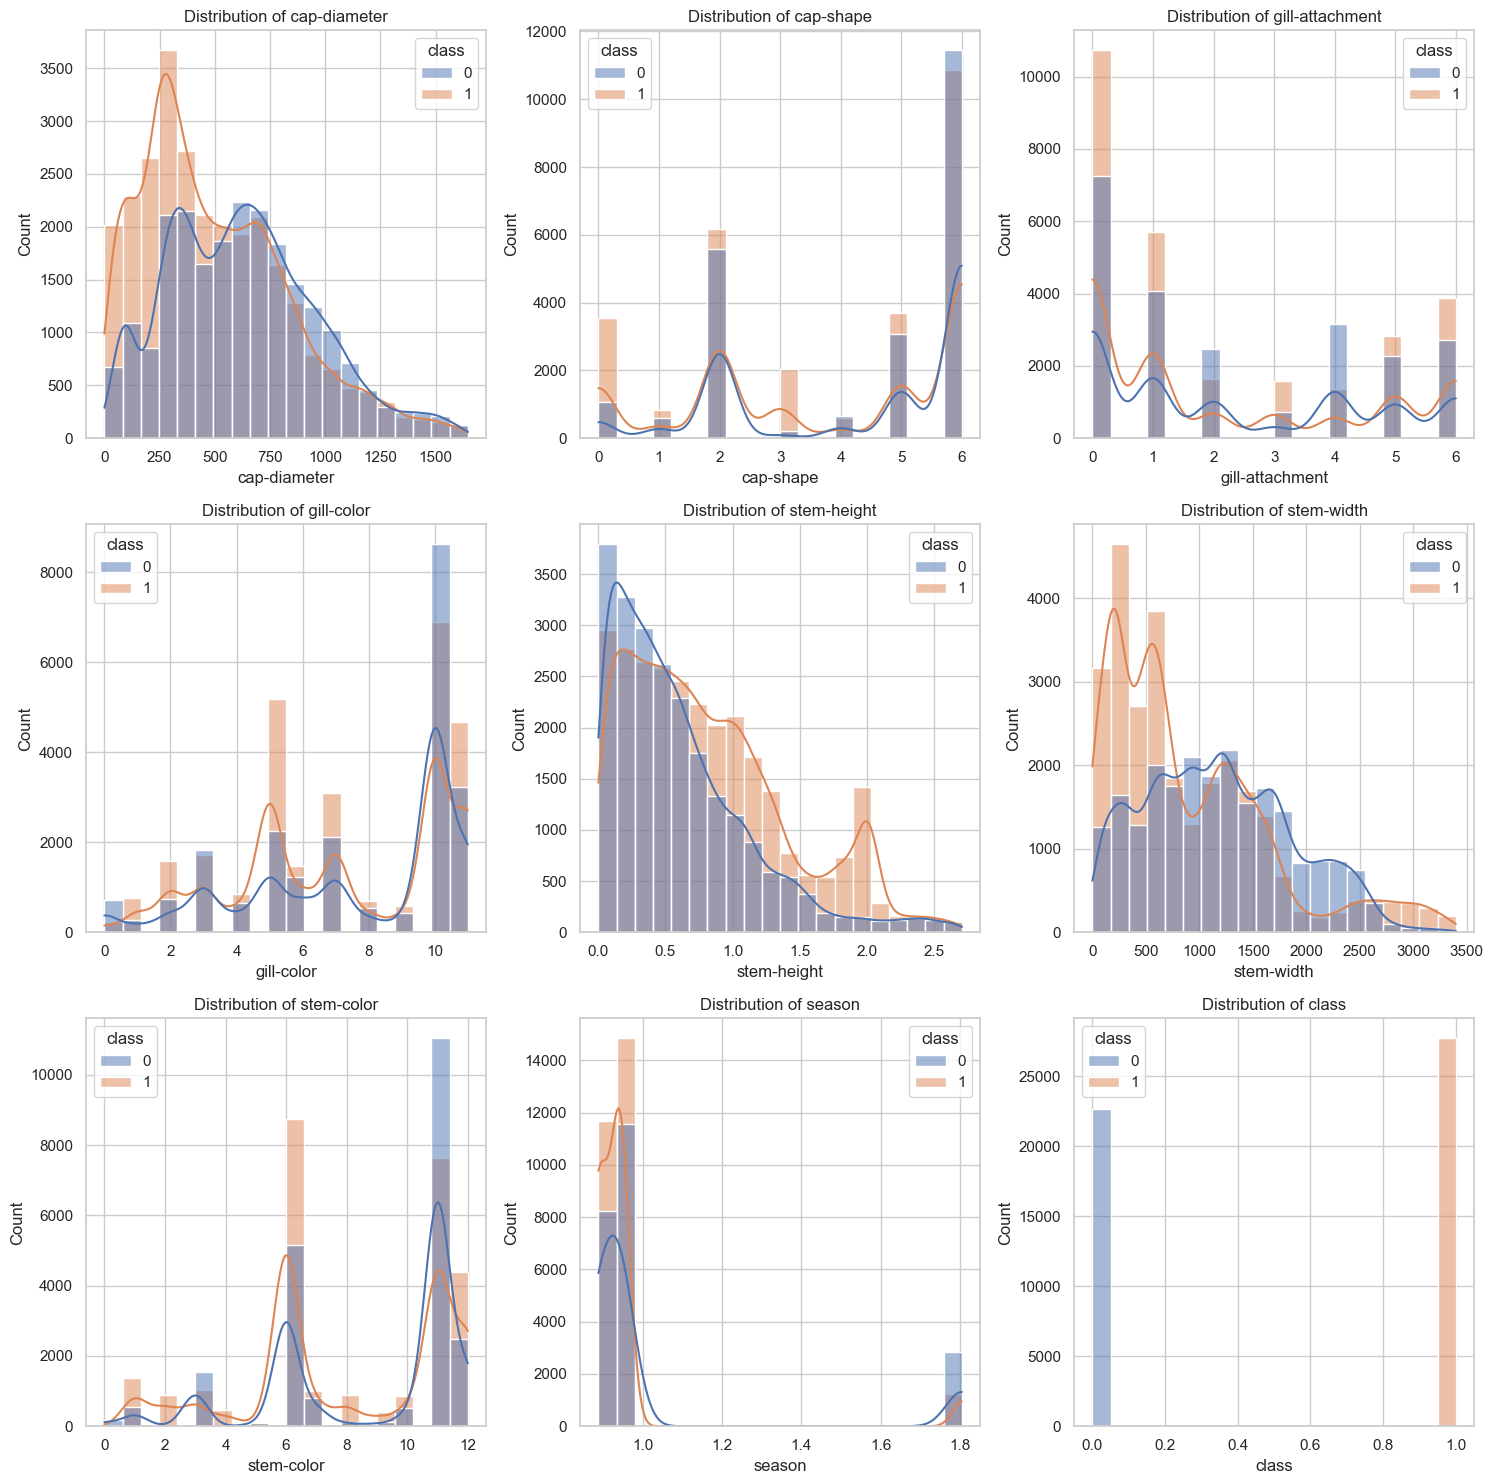

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the global display
sns.set(style="whitegrid") # Set Seaborn style
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) # Create subplots with 3 columns and 3 rows for a better display
axes = axes.flatten() # Flatten the axes array for easy iteration

# Iterate over each column in the DataFrame
for i, column in enumerate(mushrooms_df.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=mushrooms_df, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout 
plt.tight_layout()

# Display the plot
plt.show()

Now let's preprocess the clean analyzed dataset.

In [22]:
# Select the features and the labels in our dataset
X = mushrooms_df.loc[:, mushrooms_df.columns != "class"] # Features
y = mushrooms_df['class'] # Class labels

We standardize the full range of features in order to have mean value and unit variance

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Init the scaler
scaler.fit(X) # Calculate standardization parameters
X_scaled = scaler.transform(X) # Transform X datas by applying normalization

Then we can separate our dataset into a training set and a testing set

In [24]:
from sklearn.model_selection import train_test_split

# Divide datas, keeping a similar class distribution in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101, stratify=y)